In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [25]:
pd.set_option('display.max_columns', None)
seed_df = pd.read_csv("seeds_dataset.csv", names=['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
                                             'asymm_coeff', 'kernel_groove_length', 'class'])

In [26]:
seed_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymm_coeff,kernel_groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [27]:
seed_df.dtypes

area                    float64
perimeter               float64
compactness             float64
kernel_length           float64
kernel_width            float64
asymm_coeff             float64
kernel_groove_length    float64
class                     int64
dtype: object

In [61]:
class_feature_means = pd.DataFrame(columns=[1, 2, 3])
for c, rows in seed_df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means = class_feature_means.drop(['class'], axis=0)
class_feature_means

,1,2,3
area,14.334429,18.334286,11.873857
perimeter,14.294286,16.135714,13.247857
compactness,0.880070,0.883517,0.849409
kernel_length,5.508057,6.148029,5.229514
kernel_width,3.244629,3.677414,2.853771
asymm_coeff,2.667403,3.644800,4.788400
kernel_groove_length,5.087214,6.020600,5.116400


In [65]:
within_class_scatter_matrix = np.zeros((7,7))
for c, rows in seed_df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
s = np.zeros((7,7))

for index, row in rows.iterrows():
        x, mc = row.values.reshape(7,1), class_feature_means[c].values.reshape(7,1)
        s += (x - mc).dot((x - mc).T)
        within_class_scatter_matrix += s

In [73]:
feature_means = seed_df.drop(['class'], axis=1).mean()
between_class_scatter_matrix = np.zeros((7,7))
for c in class_feature_means:    
    n = len(seed_df.loc[seed_df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(7,1), feature_means.values.reshape(7,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [75]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [76]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

58.53105242898621
0.2680788855678763
2.4626670627942743e-12
1.334581357868993e-13
3.2810448314747586e-15
3.2810448314747586e-15
3.323470932973632e-16


In [77]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.9954407679233995
Eigenvector 1: 0.004559232076640075
Eigenvector 2: 4.1882711661503873e-14
Eigenvector 3: 2.269729718844856e-15
Eigenvector 4: 5.58009065460931e-17
Eigenvector 5: 5.58009065460931e-17
Eigenvector 6: 5.6522449544269565e-18


In [79]:
w_matrix = np.hstack((pairs[0][1].reshape(7,1), pairs[1][1].reshape(7,1))).real

In [44]:
>>> np.set_printoptions(precision=4)
>>> mean_vecs = []
>>> for label in range(1,4):
...     mean_vecs.append(np.mean(
...                X_train_std[y_train==label], axis=0))
...     print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [-0.1654 -0.1793  0.3187 -0.2322 -0.0459 -0.6988 -0.6057]

MV 2: [1.3464e+00 1.3496e+00 6.0032e-01 1.3262e+00 1.2516e+00 1.0571e-03
 1.4069e+00]

MV 3: [-0.9332 -0.9224 -0.7937 -0.8525 -0.9713  0.6715 -0.5586]



In [45]:
>>> d = 7 # number of features
>>> S_W = np.zeros((d, d))
>>> for label,mv in zip(range(1,4), mean_vecs):
...     class_scatter = np.zeros((d, d)) 
...     for row in X_train[y_train == label]:
...         row, mv = row.reshape(d, 1), mv.reshape(d, 1) 
...         class_scatter += (row-mv).dot((row-mv).T)
...     S_W += class_scatter                             
>>> print('Within-class scatter matrix: %sx%s'
...        % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 7x7


In [46]:
>>> print('Class label distribution: %s' 
...       % np.bincount(y_train)[1:])

Class label distribution: [51 43 53]


In [47]:
>>> d = 7 # number of features
>>> S_W = np.zeros((d, d))
>>> for label,mv in zip(range(1, 4), mean_vecs):
...     class_scatter = np.cov(X_train_std[y_train==label].T)
...     S_W += class_scatter
>>> print('Scaled within-class scatter matrix: %sx%s' 
...       % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 7x7


In [49]:
>>> mean_overall = np.mean(X_train_std, axis=0)
>>> d = 7 # number of features
>>> S_B = np.zeros((d, d))
>>> for i,mean_vec in enumerate(mean_vecs):
...     n = X_train[y_train==i+1, :].shape[0]
...     mean_vec = mean_vec.reshape(d, 1)
...     mean_overall = mean_overall.reshape(d, 1) 
    S_B += n * (mean_vec - mean_overall).dot(
...                (mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' 
...    % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 7x7


In [51]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [52]:
>>> eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) 
...              for i in range(len(eigen_vals))]
>>> eigen_pairs = sorted(eigen_pairs, 
...               key=lambda k: k[0], reverse=True)
>>> print('Eigenvalues in decreasing order:\n')
>>> for eigen_val in eigen_pairs:
...     print(eigen_val[0])

Eigenvalues in decreasing order:

326.5819031132867
138.0809896766574
4.857169213671259e-12
2.4014771008651565e-12
1.6399965163856718e-13
1.6399965163856718e-13
2.5841578028465118e-14


In [ ]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

In [89]:
discr

[0.7028362027198064,
 0.2971637972801878,
 1.0453103290662306e-14,
 2.9159385767992e-16,
 2.9159385767992e-16,
 5.561360381782612e-17,
 -5.168213640745263e-15]

In [55]:
>>> w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
...                eigen_pairs[1][1][:, np.newaxis].real))
>>> print('Matrix W:\n', w)

Matrix W:
 [[-0.4673  0.6684]
 [-0.2699 -0.6687]
 [ 0.0713 -0.1144]
 [ 0.5993 -0.201 ]
 [-0.1332  0.0397]
 [ 0.0481  0.0335]
 [-0.5697  0.2234]]


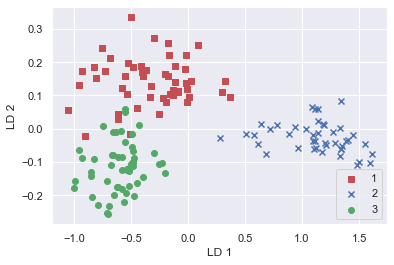

In [57]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0]*(-1), X_train_lda[y_train==l, 1]*(-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

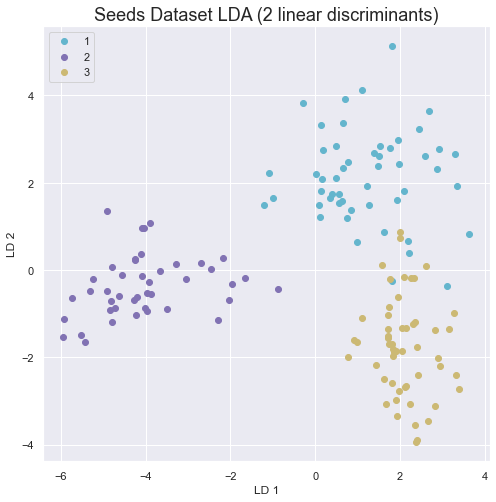

In [97]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('LD1', fontsize=12)
ax.set_ylabel('LD2', fontsize=12)
ax.set_title('Seeds Dataset LDA (2 linear discriminants)', fontsize=18)
classes = [1, 2, 3]
colors = ['c', 'm', 'y']
markers = ['o', 'o', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0]*(-1), X_train_lda[y_train==l, 1]*(-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper left')
plt.show()